### Projekt do MSP 2022/2023
-  Jan Zbořil
-  xzbori20
- xzbori20@stud.fit.vutbr.cz
---

Pro práci si nejprve importujeme potřebné moduly a data.
Data jsem si předem transformoval z excelu do `.csv`, který jsem importoval do pythonu pomocí knihovny Panda.
Využívám těchto knihoven:
 - `matplotlib` - pro kreslení grafů
 - `numpy` - pro numerické operace 
 - `pandas` - pro práci s datovou sadou a tabulkami
 - `scipy stats` - pro provádění statistických testů
 - `statsmodels` - pro lineární regresi

In [79]:
# import knihoven
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats as st
import statsmodels.api as sm

# inicializace datove say
df1 = pd.read_csv('dataset_1.csv')
df2 = pd.read_csv('dataset_2.csv')

# ulozeni nazvu mest pro dalsi pouziti
MESTA = df1['misto']
MESTA.add(str(0))

# vygeneruje tabulku pro dataset 1
# print(df1.to_markdown())
# print(df1)

# pro zadny vystup
print('')

|    |   pocet |   zimni |   letni |   stridat |   beznazoru | misto           |
|---:|--------:|--------:|--------:|----------:|------------:|:----------------|
|  0 |    1327 |     510 |     352 |       257 |         208 | praha           |
|  1 |     915 |     324 |     284 |       178 |         129 | brno            |
|  2 |     681 |     302 |     185 |       124 |          70 | znojmo          |
|  3 |     587 |     257 |     178 |        78 |          74 | tisnov          |
|  4 |     284 |     147 |      87 |        44 |           6 | paseky          |
|  5 |     176 |      66 |      58 |        33 |          19 | horni_lomna     |
|  6 |     215 |      87 |      65 |        31 |          32 | dolni_vestonice |
|  7 |      23 |       7 |      12 |         6 |           4 | okoli           |

***
# Úkol 1
Z nahraných dat jsem si vygeneroval graf ukazující počet odpovědí v jednotlivých městech.

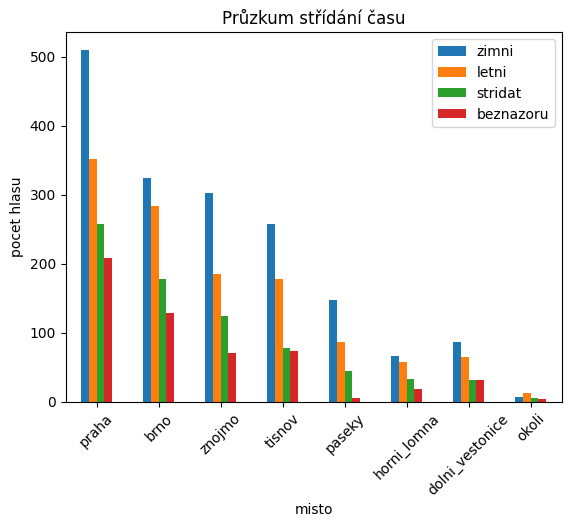

In [80]:
df11 = df1.drop(labels='pocet', axis=1)
ax = df11.plot.bar(xlabel='misto', ylabel='pocet hlasu', \
    title='Průzkum střídání času')
ax.set_xticklabels(df1['misto'], rotation=45)

plt.show()

Pro posouzení stejného procentuálního zastoupení - tedy pravděpodobnosti, že obyvatelé podporují střídání časů, letní čas nebo zimní čas - použijeme testy hypotézy homogenity v kontingenční tabulce. Takový test lze také nazvat testem dobré shody nebo $\chi^2$ test.

Pro provedení takového testu potřebujeme nejprve znát sumy řádků a sloupců. Následující kód tyto sumy počítá a navíc provádí různé další pomocné transformace

In [81]:
df11 = df1.drop(labels='misto', axis=1)
df11.drop(labels='pocet', axis=1, inplace=True)

sum_rows = df11.sum(axis=0)
sum_cols = df11.sum(axis=1)

try:
    df1.insert(len(df1.columns), 'sum_misto', sum_cols, allow_duplicates=False)
    df_temp = pd.DataFrame(sum_rows)
except:
    pass

df1.rename(columns={'pocet': 'pocet_'}, inplace=True)
df1.drop(labels='pocet_', axis=1, inplace=True)
df1.rename(index={i: MESTA[i] for i in range(0,len(MESTA))}, inplace=True)
df1 = df1.append(df_temp.T, ignore_index=False)
df1.drop(labels='misto', axis=1, inplace=True)
df1['sum_misto'] = df1['sum_misto'].replace(np.nan, sum_cols.sum())
df1.rename({0: 'sum_cas'}, inplace=True, axis=0)

df_f = df1.copy()

# print(df1.to_markdown())

/tmp/ipykernel_2556/3414897264.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append(df_temp.T, ignore_index=False)


|                 |   zimni |   letni |   stridat |   beznazoru |   sum_misto |
|:----------------|--------:|--------:|----------:|------------:|------------:|
| praha           |     510 |     352 |       257 |         208 |        1327 |
| brno            |     324 |     284 |       178 |         129 |         915 |
| znojmo          |     302 |     185 |       124 |          70 |         681 |
| tisnov          |     257 |     178 |        78 |          74 |         587 |
| paseky          |     147 |      87 |        44 |           6 |         284 |
| horni_lomna     |      66 |      58 |        33 |          19 |         176 |
| dolni_vestonice |      87 |      65 |        31 |          32 |         215 |
| okoli           |       7 |      12 |         6 |           4 |          29 |
| sum_cas         |    1700 |    1221 |       751 |         542 |        4214 |

Pro testování jednotlivých hypotéz ze zadání datovou sadu transformuju na tabulku se dvěma sloupci - počet respodnentů, co preferuje daný čas; a počet respondetů, jež uvedli jinou odpověď. Tabulka také obsahuje sloupec a řádek sum.
Následují řešení jednotlivých poúkolů.

***
#### a) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují zimní čas.  
 $\alpha = 0.05$,  
  $H_0$: V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují zimní čas.  
  $H_A$: V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co NEpreferují zimní čas.

In [82]:
df_z = df1.filter(items=['zimni'])
df_z.insert(len(df_z.columns), 'jiny', df1.iloc[:,[1,2,3]].sum(axis=1),\
    allow_duplicates=False)
df_z.insert(len(df_z.columns), 'sum_misto', df1.iloc[:,[4]].sum(axis=1),\
    allow_duplicates=False)

# print(df_z.to_markdown())

|                 |   zimni |   jiny |   sum_misto |
|:----------------|--------:|-------:|------------:|
| praha           |     510 |    817 |        1327 |
| brno            |     324 |    591 |         915 |
| znojmo          |     302 |    379 |         681 |
| tisnov          |     257 |    330 |         587 |
| paseky          |     147 |    137 |         284 |
| horni_lomna     |      66 |    110 |         176 |
| dolni_vestonice |      87 |    128 |         215 |
| okoli           |       7 |     22 |          29 |
| 0               |    1700 |   2514 |        4214 |

Z tabulky odpovědí vypočítám tabulku procent pomocí vzorce $${{ x_{i,j} } \over {\sum_i{x_i}}} * 100$$, kde $\sum_i{x_i}$ je v tabulce vyjádřen sloupcem `sum_misto`. Správnost dokazuje fakt, že sloupec pro sumu obsahuje v tabulce procent pouze hodnoty 100.

In [83]:
def dfzPerc(df_z, to_print=False):
    N = df_z.at['sum_cas','sum_misto']

    df_z_perc = pd.DataFrame(data=np.zeros((9, len(df_z.columns))),\
        columns=df_z.columns)
    df_z_perc.rename(index={i: MESTA[i] for i in range(0,len(MESTA))},\
        inplace=True)
    df_z_perc.rename({8: 'sum_cas'}, inplace=True, axis=0)

    suma = 0
    try:
        for i in range(0,9):
            for j in range(0,2):
                df_z_perc.iat[i,j] = ( df_z.iat[i,j] /  df_z.iat[i,2] ) * 100
                suma = suma + df_z_perc.iat[i,j]

            df_z_perc.iat[i,2] = suma
            suma = 0
    except:
        pass

    if to_print:
        print("-------------------")
        print("dfz procenta:")
        print(df_z_perc.to_markdown())
        print("-------------------")
    return df_z_perc

df_z_perc = dfzPerc(df_z)


Tabulka procent pro zimní/jiný čas:



|                 |   zimni |    jiny |   sum_misto |
|:----------------|--------:|--------:|------------:|
| praha           | 38.4326 | 61.5674 |         100 |
| brno            | 35.4098 | 64.5902 |         100 |
| znojmo          | 44.3465 | 55.6535 |         100 |
| tisnov          | 43.7819 | 56.2181 |         100 |
| paseky          | 51.7606 | 48.2394 |         100 |
| horni_lomna     | 37.5    | 62.5    |         100 |
| dolni_vestonice | 40.4651 | 59.5349 |         100 |
| okoli           | 24.1379 | 75.8621 |         100 |
| sum_cas         | 40.3417 | 59.6583 |         100 |

S pomocí tabulky procent jsem spočítal tabulku očekávaných četností. Požil jsem následující vzorec $$ m_{i,j} = {{n_i n_j} \over n}  $$

In [84]:
def ocekavaneDfz(df_z, df_z_perc, to_print=False):
    dfm_z = pd.DataFrame(data=np.zeros((8, len(df_z.columns))),\
        columns=df_z.columns)
    dfm_z.rename(index={i: MESTA[i] for i in range(0,len(MESTA))},\
        inplace=True)
    dfm_z.drop(labels='sum_misto', axis=1, inplace=True)

    for i in range(0,len(df_z.index)-1):
        for j in range(0,len(df_z.columns)-1):
            dfm_z.iat[i,j] = (df_z_perc.iat[len(df_z.index)-1,j] / 100)\
                * df_z.iat[i,len(df_z.columns)-1]
         
    if to_print:
        print("-------------------")
        print("ocekavane (m) dfm_z")
        print(dfm_z.to_markdown())
        print("-------------------")

    return dfm_z

dfm_z = ocekavaneDfz(df_z, df_z_perc)

Tabulka očekávaných četností $m_{i,j}$:


|                 |    zimni |     jiny |
|:----------------|---------:|---------:|
| praha           | 535.335  | 791.665  |
| brno            | 369.127  | 545.873  |
| znojmo          | 274.727  | 406.273  |
| tisnov          | 236.806  | 350.194  |
| paseky          | 114.57   | 169.43   |
| horni_lomna     |  71.0014 | 104.999  |
| dolni_vestonice |  86.7347 | 128.265  |
| okoli           |  11.6991 |  17.3009 |


  
  
Pro otestování hypotézy $H_0$ jsem vyžil testu dobré shody, pro nějž je potřeba spočítat hodnotu $\chi^2$ následujícím vzorcem.
 $$  \chi^2 = \sum_{i=1}^{R}\sum_{j=1}^{S} {{( n_{i,j} - m_{i,j})^2} \over {m_{i,j}}} $$

Doplněk kritického oboru je < 0 ; $\chi^2_{0.95}(v) >$ , kde $v = (r-1) * (s-1)$ představuje počet stupňů volnosti, kde $s$ je počet sloupců tabulky a $r$ je počet řádků v tabulce. Pokud hodnota $\chi^2$ náleží kritickému oboru, pak hypotézu $H_0$ nezamítám, jinak hypotézu $H_0$ zamítám na hladině významnosti $\alpha$ a platí alternativní hypotéza.

In [85]:
def chiCalc(df_z, dfm_z):
    chi_z = 0
    alpha = 0.05
    for i in range(0, len(dfm_z.index)):
        for j in range(0, len(dfm_z.columns)):
            chi_z = chi_z + (((df_z.iat[i,j] - dfm_z.iat[i,j]) ** 2)\
                / dfm_z.iat[i,j])

    print("------------------")
    print("CHI^2 = {}, stupne volnosti = {}".format(chi_z,\
        (len(dfm_z.index)-1)*(len(dfm_z.columns)-1)))

    critical_value = st.chi2.ppf(1-alpha, \
        (len(dfm_z.index)-1)*(len(dfm_z.columns)-1))

    print("Doplnek kritickeho oboru = < 0 ; {} >"\
        .format(critical_value))

    if chi_z > critical_value:
        print("H0 zamitam")
    else:
        print("H0 nezamitam")
    print("------------------")
        
chiCalc(df_z, dfm_z)

------------------
CHI^2 = 37.82410668971246, stupne volnosti = 7
Doplnek kritickeho oboru = < 0 ; 14.067140449340169 >
H0 zamitam
------------------


Obdobně jako u příkladu a) postupujeme také v příkladech b) a c)

***
#### b) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují letní čas.  
$\alpha = 0.05$,  
$H_0$: V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují zimní čas.  
$H_A$: V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co NEpreferují letní čas.

In [86]:
df_z = df1.filter(items=['letni'])
df_z.insert(len(df_z.columns), 'jiny', df1.iloc[:,[0,2,3]].sum(axis=1),\
    allow_duplicates=False)
df_z.insert(len(df_z.columns), 'sum_misto', df1.iloc[:,[4]].sum(axis=1),\
    allow_duplicates=False)

# print(df_z.to_markdown())

|                 |   letni |   jiny |   sum_misto |
|:----------------|--------:|-------:|------------:|
| praha           |     352 |    975 |        1327 |
| brno            |     284 |    631 |         915 |
| znojmo          |     185 |    496 |         681 |
| tisnov          |     178 |    409 |         587 |
| paseky          |      87 |    197 |         284 |
| horni_lomna     |      58 |    118 |         176 |
| dolni_vestonice |      65 |    150 |         215 |
| okoli           |      12 |     17 |          29 |
| sum_cas         |    1221 |   2993 |        4214 |


In [87]:
df_z_perc = dfzPerc(df_z)
dfm_z = ocekavaneDfz(df_z, df_z_perc)
chiCalc(df_z, dfm_z)


------------------
CHI^2 = 11.429528731041264, stupne volnosti = 7
Doplnek kritickeho oboru = < 0 ; 14.067140449340169 >
H0 nezamitam
------------------


***
#### c) V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují střídání času.
$\alpha = 0.05$,  
$H_0$: V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co preferují střídání času.  
$H_A$: V městech, obcích a v okolí studenta (8. průzkumů) je stejné procentuální zastoupení obyvatel, co NEpreferují střídání času.

In [88]:
df_z = df1.filter(items=['stridat'])
df_z.insert(len(df_z.columns), 'jiny', df1.iloc[:,[0,1,3]].sum(axis=1),\
    allow_duplicates=False)
df_z.insert(len(df_z.columns), 'sum_misto', df1.iloc[:,[4]].sum(axis=1),\
    allow_duplicates=False)

# print(df_z.to_markdown())

|                 |   stridat |   jiny |   sum_misto |
|:----------------|----------:|-------:|------------:|
| praha           |       257 |   1070 |        1327 |
| brno            |       178 |    737 |         915 |
| znojmo          |       124 |    557 |         681 |
| tisnov          |        78 |    509 |         587 |
| paseky          |        44 |    240 |         284 |
| horni_lomna     |        33 |    143 |         176 |
| dolni_vestonice |        31 |    184 |         215 |
| okoli           |         6 |     23 |          29 |
| sum_cas         |       751 |   3463 |        4214 |

In [89]:
df_z_perc = dfzPerc(df_z)
dfm_z = ocekavaneDfz(df_z, df_z_perc)
chiCalc(df_z, dfm_z)


------------------
CHI^2 = 15.153830811721116, stupne volnosti = 7
Doplnek kritickeho oboru = < 0 ; 14.067140449340169 >
H0 zamitam
------------------


***
 Pro příklad d) a e) je nutné vytvořit nové kategorie mšst - větší, menší a vesnice, a pracovat s nimi. Hodnoty nových kategorií vzniknou sečtením hodnot  původních měst patřících do stejné kategorie.
#### d) U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení obyvatel, co preferují zimní čas.  
 $\alpha = 0.05$,  
 $H_0$:  U větších měst, menších měst a obcí (3. průzkumy) je stejné  procentuální zastoupení obyvatel, co preferují zimní čas.  
 $H_A$:  U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení obyvatel, co NEpreferují zimní čas.  

In [90]:
df_z = df1.filter(items=['zimni'])
df_z.insert(len(df_z.columns), 'jiny', df1.iloc[:,[1,2,3]].sum(axis=1),\
    allow_duplicates=False)
df_z.insert(len(df_z.columns), 'sum_misto', df1.iloc[:,[4]].sum(axis=1),\
    allow_duplicates=False)

vetsi = df_z.iloc[[0,1],:].sum(axis=0)
mensi = df_z.iloc[[2,3],:].sum(axis=0)
vesnice = df_z.iloc[[4,5,6],:].sum(axis=0)
x = df_z.iloc[[8],:].sum(axis=0)

df_z = pd.DataFrame(([vetsi, mensi, vesnice, x]), columns=df_z.columns)
df_z.rename(index={0: 'vetsi', 1: 'mensi', 2: 'vesnice', 3: 'sum_cas'},\
    inplace=True)

# print(df_z.to_markdown())

|         |   zimni |   jiny |   sum_misto |
|:--------|--------:|-------:|------------:|
| vetsi   |     834 |   1408 |        2242 |
| mensi   |     559 |    709 |        1268 |
| vesnice |     300 |    375 |         675 |
| sum_cas       |    1700 |   2514 |        4214 |

In [91]:
def dfzPerc2(df_z, toprint = False):
    N = df_z.at['sum_cas','sum_misto']

    df_z_perc = pd.DataFrame(data=np.zeros((4, len(df_z.columns))),\
        columns=df_z.columns)
    df_z_perc.rename(\
        index={0: 'vetsi', 1: 'mensi', 2: 'vesnice', 3: 'sum_cas'}\
            , inplace=True)


    suma = 0
    try:
        for i in range(0,4):
            for j in range(0,2):
                df_z_perc.iat[i,j] = \
                    ( df_z.iat[i,j] /  df_z.iat[i,2] ) * 100
                suma = suma + df_z_perc.iat[i,j]

            df_z_perc.iat[i,2] = suma
            suma = 0
    except:
        pass

    if toprint:
        print("-------------------")
        print("dfz procenta:")
        print(df_z_perc.to_markdown())
        print("-------------------")
    return df_z_perc

def ocekavaneDfz2(df_z, df_z_perc, toprint = False):
    dfm_z = pd.DataFrame(data=np.zeros((3, len(df_z.columns))),\
        columns=df_z.columns)
    dfm_z.rename(\
        index={0: 'vetsi', 1: 'mensi', 2: 'vesnice', 3: '0'},\
            inplace=True)
    # dfm.drop(labels='misto', axis=1, inplace=True)
    dfm_z.drop(labels='sum_misto', axis=1, inplace=True)

    for i in range(0,3):
        for j in range(0,2):
            # print(df_z_perc.iat[8,j] / 100 , df_z.iat[i,2] )
            dfm_z.iat[i,j] = (df_z_perc.iat[3,j] / 100) \
                * df_z.iat[i,2]
      
    if toprint:      
        print("-------------------")
        print("ocekavane (m) dfm_z")
        print(dfm_z.to_markdown())
        print("-------------------")
    return dfm_z

def chiCalc2(df_z, dfm_z):
    chi_z = 0
    alpha = 0.05
    for i in range(0,3):
        for j in range(0,2):
            chi_z = chi_z + (((df_z.iat[i,j] - dfm_z.iat[i,j]) ** 2)\
                / dfm_z.iat[i,j])

    print("------------------")
    print("CHI^2 = " , chi_z,)

    critical_value = st.chi2.ppf(1-alpha, \
        df=(len(dfm_z.index)-1)*(len(dfm_z.columns)-1))

    print("Kriticka hodnota = ",critical_value, ",\
        stupne volnosti = ", \
            (len(dfm_z.index)-1)*(len(dfm_z.columns)-1))

    if chi_z > critical_value:
        print("H0 zamitam")
    else:
        print("H0 nezamitam")
    print("------------------")

df_z_perc = dfzPerc2(df_z, False)
dfm_z = ocekavaneDfz2(df_z, df_z_perc, False)


Tabulka procent:

|         |   zimni |    jiny |   sum_misto |
|:--------|--------:|--------:|------------:|
| vetsi   | 37.1989 | 62.8011 |         100 |
| mensi   | 44.0852 | 55.9148 |         100 |
| vesnice | 44.4444 | 55.5556 |         100 |
| sum_cas | 40.3417 | 59.6583 |         100 |



Tabulka očekávaných četností $m_{i,j}$


|         |   zimni |     jiny |
|:--------|--------:|---------:|
| vetsi   | 904.461 | 1337.54  |
| mensi   | 511.533 |  756.467 |
| vesnice | 272.307 |  402.693 |

In [92]:
chiCalc2(df_z, dfm_z)

------------------
CHI^2 =  21.305122713194553
Kriticka hodnota =  5.991464547107979 ,        stupne volnosti =  2
H0 zamitam
------------------


***
#### e) $H_0$: U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení nerozhodnutelných obyvatel. 
$\alpha = 0.05$  
$H_0$: U větších měst, menších měst a obcí (3. průzkumy) je stejné procentuální zastoupení nerozhodnutelných obyvatel  
$H_A$: U větších měst, menších měst a obcí (3. průzkumy) NENÍ stejné procentuální zastoupení nerozhodnutelných obyvatel

In [93]:
df_z = df1.filter(items=['beznazoru'])
df_z.insert(len(df_z.columns), 'jiny', df1.iloc[:,[1,2,0]].sum(axis=1),\
    allow_duplicates=False)
df_z.insert(len(df_z.columns), 'sum_misto', df1.iloc[:,[4]].sum(axis=1),\
    allow_duplicates=False)


vetsi = df_z.iloc[[0,1],:].sum(axis=0)
mensi = df_z.iloc[[2,3],:].sum(axis=0)
vesnice = df_z.iloc[[4,5,6],:].sum(axis=0)
x = df_z.iloc[[8],:].sum(axis=0)

df_z = pd.DataFrame(([vetsi, mensi, vesnice, x]), columns=df_z.columns)
df_z.rename(index={0: 'vetsi', 1: 'mensi', 2: 'vesnice', 3: 'sum_cas'},\
    inplace=True)

# print(df_z.to_markdown())

df_z_perc = dfzPerc2(df_z)
dfm_z = ocekavaneDfz2(df_z, df_z_perc)


Tabulka četností:  


|         |   beznazoru |   jiny |   sum_misto |
|:--------|------------:|-------:|------------:|
| vetsi   |         337 |   1905 |        2242 |
| mensi   |         144 |   1124 |        1268 |
| vesnice |          57 |    618 |         675 |
| sum_cas |         542 |   3672 |        4214 |

Tabulka četností v procentech:




|         |   beznazoru |    jiny |   sum_misto |
|:--------|------------:|--------:|------------:|
| vetsi   |    15.0312  | 84.9688 |         100 |
| mensi   |    11.3565  | 88.6435 |         100 |
| vesnice |     8.44444 | 91.5556 |         100 |
| sum_cas |    12.8619  | 87.1381 |         100 |



Tabulka očekávanýc četností $m_{i,j}$:


|         |   beznazoru |     jiny |
|:--------|------------:|---------:|
| vetsi   |    288.364  | 1953.64  |
| mensi   |    163.089  | 1104.91  |
| vesnice |     86.8178 |  588.182 |

In [94]:
chiCalc2(df_z, dfm_z)

------------------
CHI^2 =  23.73062762989995
Kriticka hodnota =  5.991464547107979 ,        stupne volnosti =  2
H0 zamitam
------------------


***
#### f) Na základě odpovědí z okolí studenta zkuste určit z dat, zda student prováděl výzkum ve větším městě, menším městě nebo v obci.  
Porovnejte výsledek se skutečností a okomentujte.  
Příklad jsem počítal pomocí párového T-testu.

In [95]:
vetsi = df_f.iloc[[0,1],:].sum(axis=0)
mensi = df_f.iloc[[2,3],:].sum(axis=0)
vesnice = df_f.iloc[[4,5,6],:].sum(axis=0)
okoli = df_f.iloc[[7],:].sum(axis=0)

df_fvet = pd.DataFrame(([vetsi, okoli]), columns=df_f.columns)
df_fmen = pd.DataFrame(([mensi, okoli]), columns=df_f.columns)
df_fves = pd.DataFrame(([vesnice, okoli]), columns=df_f.columns)

df_fvet.rename(index={0: 'vetsi', 1: 'okoli'}, inplace=True)
df_fmen.rename(index={0: 'mensi', 1: 'okoli'}, inplace=True)
df_fves.rename(index={0: 'vesnice', 1: 'okoli'}, inplace=True)

df_fves = df_fves.T
df_fmen = df_fmen.T
df_fvet = df_fvet.T

for i in [df_fvet, df_fmen, df_fves]:
    i.loc[len(i.index)] = i.sum(axis=0)
    i.rename(index={2: 'sum_cas'}, inplace=True)
    print("{}: ".format(i.columns[0]))
    print(i.to_markdown())

vetsi: 
|           |   vetsi |   okoli |
|:----------|--------:|--------:|
| zimni     |     834 |       7 |
| letni     |     636 |      12 |
| stridat   |     435 |       6 |
| beznazoru |     337 |       4 |
| sum_misto |    2242 |      29 |
| 5         |    4484 |      58 |
mensi: 
|           |   mensi |   okoli |
|:----------|--------:|--------:|
| zimni     |     559 |       7 |
| letni     |     363 |      12 |
| stridat   |     202 |       6 |
| beznazoru |     144 |       4 |
| sum_misto |    1268 |      29 |
| 5         |    2536 |      58 |
vesnice: 
|           |   vesnice |   okoli |
|:----------|----------:|--------:|
| zimni     |       300 |       7 |
| letni     |       210 |      12 |
| stridat   |       108 |       6 |
| beznazoru |        57 |       4 |
| sum_misto |       675 |      29 |
| 5         |      1350 |      58 |


Četnost ve větších městech a okolí: : 



|         |   zimni |   letni |   stridat |   beznazoru |   sum_misto |
|:--------|--------:|--------:|----------:|------------:|------------:|
| vetsi   |     834 |     636 |       435 |         337 |        2242 |
| okoli   |       7 |      12 |         6 |           4 |          29 |
| sum_cas |     841 |     648 |       441 |         341 |        2271 |

Četnost v menších městech a okolí: 


|         |   zimni |   letni |   stridat |   beznazoru |   sum_misto |
|:--------|--------:|--------:|----------:|------------:|------------:|
| mensi   |     559 |     363 |       202 |         144 |        1268 |
| okoli   |       7 |      12 |         6 |           4 |          29 |
| sum_cas |     566 |     375 |       208 |         148 |        1297 |

Četnost ve vesnicích a okolí:  

|         |   zimni |   letni |   stridat |   beznazoru |   sum_misto |
|:--------|--------:|--------:|----------:|------------:|------------:|
| vesnice |     300 |     210 |       108 |          57 |         675 |
| okoli   |       7 |      12 |         6 |           4 |          29 |
| sum_cas |     307 |     222 |       114 |          61 |         704 |

In [96]:
# for i in [df_fvet, df_fmen, df_fves]:
#     lokalita = i.values[0]
#     okoli = i.values[1]
#     t_test_rest = st.ttest_rel(lokalita, okoli,\
#         alternative='two-sided')
#     print(i.index[0])
#     print("Statistika = {}, P-Hodnota = {} \n".\
#         format(t_test_rest.statistic, t_test_rest.pvalue))
    

# using chi square test, test that the proportion of df_fvet and df_men are the same
# hypothesis: the proportion of df_fvet and df_men are the same
# aleternative: the proportion of df_fvet and df_men are not the same

df_z_perc
for i in range(0,4):
    for j in range(0,2):
        df_z_perc.iat[i,j] = \
            ( df_z.iat[i,j] /  df_z.iat[i,2] ) * 100
        suma = suma + df_z_perc.iat[i,j]

    df_z_perc.iat[i,2] = suma
    suma = 0

NameError: name 'suma' is not defined

Po provedení párového T-testu ani jedna z P-hodnot není menší než $\alpha = 0.05$, proto nemůžeme potvrdit, že platí $H_0$, tedy že jsem prováděl výzkum vě větším/menším městě nebo na vesnici. Nejblíže se však hodnotě $\alpha = 0.05$ blíží P-hodnota pro větší města. Svůj výzkum jsem ve skutečnosti prováděl částečně v Brně (větší město) a v Přerově (menší město, ale počtem obyvatel větší než Znojmo nebo Tišnov). Výsledky testu tedy celkem odpovídají realitě.

***
# 2. Regrese


#### a) Určete vhodný model pomocí zpětné metody a regresní diagnostiky.  
Pro výpočet vhodného modelu jsem použil metodu, kdy nejprve vypočítám regresní model se všemi parametry a následně odeberu z modelu ten parametr, pro který vyšla ve Studentově T-testu největší P-hodnota. Pro tento test jsem volil hypotézy:  
$H_0$ parametr  $\beta_i = 0$  
$H_A$ parametr $\beta_i \neq 0$
Parametr $\beta_i$ s největší P-hodnotou jsem odstranil, protože označuje koeficient, který není pro můj příklad statisticky signifikantní. Nikdy jsem ale neodtstanil konstantu $\beta_1$, i když měla největší P-hodnotu. Nastal-li tento případ, odstranil jsem parametr s druhou největší hodnotou.  
Po každém odstranění nějakého parametru jsem model přepočítal. Takto jsem opakoval, dokud nezbyly statisticky významné koeficienty ($P-hodnota \leq \alpha$) a konstanta $\beta_1$


In [ ]:
x = (df2.iloc[:,0]).to_numpy()
y = (df2.iloc[:,1]).to_numpy()
z = (df2.iloc[:,2]).to_numpy()

xx = []
yy = []
zz = []

for j in x:
    j = j.replace(',','.')
    xx.append(float(j))

for j in y:
    j = j.replace(',','.')
    yy.append(float(j))

for j in z:
    j = j.replace(',','.')
    zz.append(float(j))

x = np.array(xx)
y = np.array(yy)
z = np.array(zz)

def calcModel(F, print_summary=False, useConstant=False):
    if useConstant:
        F = sm.add_constant(F)

    model = sm.OLS(z, F).fit()
    if print_summary:
        print(model.summary())
    else:
        print(model.rsquared)
    return model

F = np.column_stack((x, y, x**2, y**2, x*y))
model = calcModel(F, True, True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.036e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.21e-91
Time:                        15:16:38   Log-Likelihood:                -335.87
No. Observations:                  70   AIC:                             683.7
Df Residuals:                      64   BIC:                             697.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7385     14.691      0.050      0.9

In [ ]:
F = np.column_stack((y, x**2, y**2, x*y))
model = calcModel(F, True, True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.311e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.10e-93
Time:                        15:16:39   Log-Likelihood:                -335.98
No. Observations:                  70   AIC:                             682.0
Df Residuals:                      65   BIC:                             693.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2817     10.616      0.498      0.6

In [ ]:
F = np.column_stack((x**2, y**2, x*y))
model = calcModel(F, True, True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.751e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.18e-95
Time:                        15:16:39   Log-Likelihood:                -336.46
No. Observations:                  70   AIC:                             680.9
Df Residuals:                      66   BIC:                             689.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8588      6.935      1.854      0.0

In [ ]:
F = np.column_stack((x**2, y**2, x*y))
model = calcModel(F, True, True)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.751e+04
Date:                Sun, 04 Dec 2022   Prob (F-statistic):           1.18e-95
Time:                        15:16:39   Log-Likelihood:                -336.46
No. Observations:                  70   AIC:                             680.9
Df Residuals:                      66   BIC:                             689.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8588      6.935      1.854      0.0

Po opakovaném výpoču modelu a odstraňování nevýznamných parametrlů jsem získal model:

$$ Z = \beta_1 + \beta_2X^2 + \beta_3Y^2 + \beta_4XY $$
$$ \equiv $$
$$ z = 12.8588 + 4.0681x^2 + 5.1603y^2 + 6.1720xy $$

Výsledný regresní model vykreslíme:

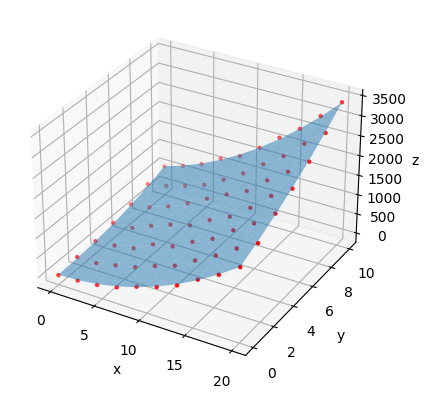

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='.', color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

beta1 = model.params[0]
beta2 = model.params[1]
beta3 = model.params[2]
beta4 = model.params[3]

z_line = beta2 * x**2 + beta3 * y**2 + beta4 * x*y + beta1

surf = ax.plot_trisurf(x, y, z_line,  alpha=0.5, linewidth=0, antialiased=True)

plt.show()

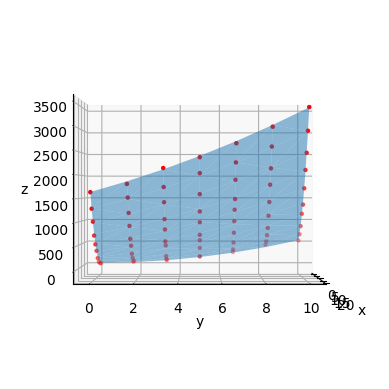

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='.', color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

surf = ax.plot_trisurf(x, y, z_line,  alpha=0.5, linewidth=0, antialiased=True)
ax.view_init(0, 0)

plt.show()

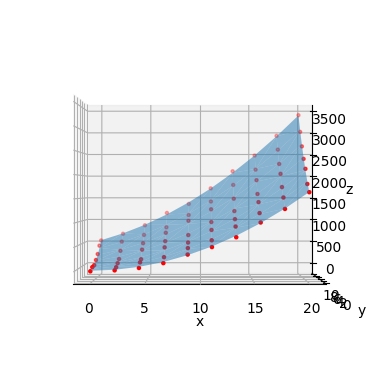

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, marker='.', color='red')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

surf = ax.plot_trisurf(x, y, z_line,  alpha=0.5, linewidth=0, antialiased=True)
ax.view_init(0, -90)

plt.show()

#### b) Pro takto získaný model (dostatečný submodel) uveďte v jedné tabulce odhady regresních parametrů metodou nejmenších čtverců a jejich 95% intervaly spolehlivosti.

In [ ]:
df_param = pd.DataFrame(model.params, columns=['parametry'])
df_param.index = ['beta0', 'beta1', 'beta2', 'beta3']
df_param.insert(1, 'interval L', model.conf_int()[:,0])
df_param.insert(2, 'interval P', model.conf_int()[:,1])

# print(df_param.to_markdown())

Tabulka získaných koeficientů $\beta$ modelu a jejich 95% intervaly spolehlivosti:


|       |   parametry |   interval L |   interval P |
|:------|------------:|-------------:|-------------:|
| $\beta_1$ |    12.8588  |    -0.987861 |     26.7055  |
| $\beta_2$ |     4.06806 |     3.98064  |      4.15548 |
| $\beta_3$ |     5.16028 |     4.81747  |      5.5031  |
| $\beta_4$ |     6.17201 |     5.87819  |      6.46584 |



#### c) Nestranně odhadněte rozptyl závisle proměnné. 

In [ ]:
print("Rozptyl závislé proměnné Z = ", model.mse_resid)

Rozptyl závislé proměnné Z =  928.8752852687966


#### d) Vhodným testem zjistěte, že vámi zvolené dva regresní parametry jsou současně nulové.  
Pro ověření hypotézy, že dva regresní parametry jsou současně nulové jsem využil jsem F-test (Fisherovo-Snedecorovo rozdělení).  
Vybrané parametry - $\beta_2$ a $\beta_3$  
$H_0:$ dva regresní parametry jsou současně nulové  
$H_A:$ dva regresní parametry NEjsou současně nulové

In [ ]:
f = model.f_test("x1=x2=0")

print((f))

if(f.pvalue > 0.05):
    print("H0 nezamitame")
else:
    print("H0 zamitame")

<F test: F=4912.283415242425, p=1.594596743515046e-72, df_denom=66, df_num=2>
H0 zamitame


#### e) Vhodným testem zjistěte, že vámi zvolené dva regresní parametry jsou stejné.
Vybrané parametry - $\beta_3$ a $\beta_4$  
$H_0:$ dva regresní parametry jsou stejné   
$H_A:$ dva regresní parametry NEjsou stejné

In [ ]:
print(model.f_test("x2 = x3"))
if(model.f_test("x2 = x3").pvalue > 0.05):
    print("H0 nezamitame")
else:
    print("H0 zamitame")

<F test: F=11.233116388450709, p=0.0013330450705401292, df_denom=66, df_num=1>
H0 zamitame


Výsledky tohoto testu jsou očekávané, protože $\beta_3$ = 5.16028, interval = <4.81747 ; 5.5031> a $\beta_4$ = 6.17201 , interval = <5.87819 ; 6.46584>